<a href="https://colab.research.google.com/github/santiagoprado12/cursoMLpython/blob/main/Correlacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

In [26]:
mainpath="/Users/santi/OneDrive/Documents/Curso machine learning con python/Repositorio/python-ml-course/datasets"
filename="ads/Advertising.csv"
fullpath=mainpath+"/"+filename

In [45]:
data_ads=pd.read_csv(fullpath)

In [46]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
len(data_ads)

200

In [22]:
import numpy as np

In [7]:
data_ads["corrn"]=(data_ads["TV"]-np.mean(data_ads["TV"]))*(data_ads["Sales"]-np.mean(data_ads["Sales"]))

In [33]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
data_ads["corr1"]=(data_ads["TV"]-np.mean(data_ads["TV"]))**2

In [10]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [11]:
##diferencia con respecto a la media
data_ads["corr2"]=(data_ads["Sales"]-np.mean(data_ads["Sales"]))**2

In [12]:
#Valor de la correlacion  de pearson
corr_pearson=sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"])*sum(data_ads["corr2"]))

In [13]:
#Entre mas cercano a 1 esta mas correlacionado de forma directamente proporcional
corr_pearson

0.782224424861606

In [14]:
def corr_coeff(df, var1, var2):
    df["corrn"]=(df[var1]-np.mean(df[var1]))*(df[var2]-np.mean(df[var2]))
    df["corr1"]=(df[var1]-np.mean(df[var1]))**2
    df["corr2"]=(df[var2]-np.mean(df[var2]))**2
    corr_pearson=sum(df["corrn"])/np.sqrt(sum(df["corr1"])*sum(df["corr2"]))
    return corr_pearson

In [34]:
cols=data_ads.columns.values

In [35]:
for x in cols:
  for y in cols:
    print(x+", "+y+":"+str(corr_coeff(data_ads,x,y)))

TV, TV:1.0
TV, Radio:0.05480866446583009
TV, Newspaper:0.056647874965056993
TV, Sales:0.782224424861606
Radio, TV:0.05480866446583009
Radio, Radio:1.0
Radio, Newspaper:0.3541037507611752
Radio, Sales:0.5762225745710553
Newspaper, TV:0.056647874965056993
Newspaper, Radio:0.3541037507611752
Newspaper, Newspaper:1.0
Newspaper, Sales:0.22829902637616525
Sales, TV:0.782224424861606
Sales, Radio:0.5762225745710553
Sales, Newspaper:0.22829902637616525
Sales, Sales:1.0


La television tiene mas repercusion en las ventas

In [36]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Ventas de producto')

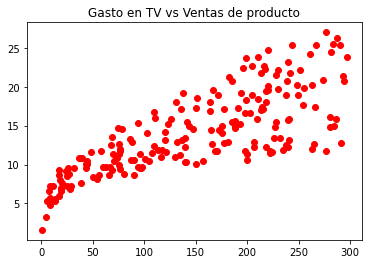

In [38]:
plt.plot(data_ads["TV"], data_ads["Sales"],"ro")
plt.title("Gasto en TV vs Ventas de producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas de producto')

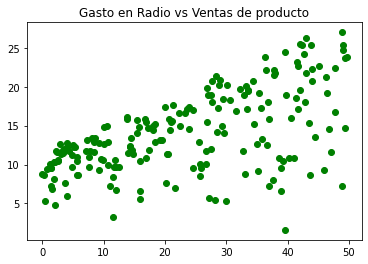

In [41]:
plt.plot(data_ads["Radio"], data_ads["Sales"],"go")
plt.title("Gasto en Radio vs Ventas de producto")

Text(0.5, 1.0, 'Gasto en periodico vs Ventas de producto')

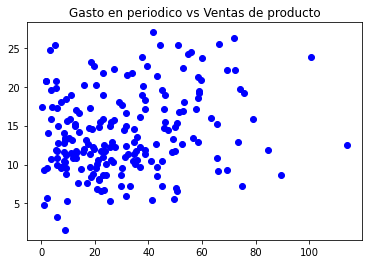

In [42]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"],"bo")
plt.title("Gasto en periodico vs Ventas de producto")

In [47]:
#Usando librerias de python
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


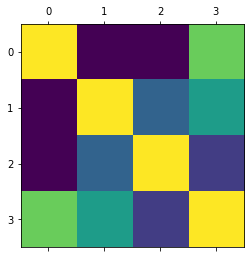

In [48]:
plt.matshow(data_ads.corr())